# Advertising Dataset

In [1]:
import  pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df=pd.read_csv('advertising.csv')

In [6]:
df.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


In [15]:
df.drop((['City','Country','Ad Topic Line','Timestamp']),axis=1,inplace=True)

In [17]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,0,2016-06-03 03:36:18,0


In [43]:
year=[]
for i in range(len(df['Timestamp'])):
    year.append(int((df['Timestamp'][i].split('-')[1])))

In [44]:
df['month in 2016']=year

In [45]:
df['month in 2016'].value_counts()

2    160
3    156
4    147
1    147
5    147
6    142
7    101
Name: month in 2016, dtype: int64

In [46]:
df.drop('year',axis=1,inplace=True)

In [48]:
df.drop(['Timestamp','Ad Topic Line'],axis=1,inplace=True)

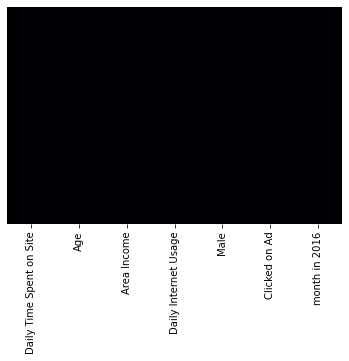

In [51]:
sns.heatmap(df.isnull(),cmap='magma',yticklabels=False, cbar=False);

## Data is ready to deal with the further analysis

In [53]:
df.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,month in 2016
0,68.95,35,61833.90,256.09,0,0,3
1,80.23,31,68441.85,193.77,1,0,4


## Creating the model before creating the new features

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X=df.drop('Clicked on Ad',axis=1)
y=df['Clicked on Ad']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [119]:
from sklearn.svm import SVC

In [131]:
model=SVC(kernel='linear')

In [132]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [133]:
pred=model.predict(X_test)

In [134]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## Highest Accuracy

In [137]:
print(accuracy_score(y_test,pred)*100,'%')

96.0 %


## NO need of SCaling

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler=StandardScaler()

In [58]:
scaler.fit(df.drop(['Clicked on Ad','Male'],axis=1))

StandardScaler()

In [62]:
features =scaler.transform(df.drop(['Clicked on Ad','Male'],axis=1))

In [63]:
df_fit=pd.DataFrame(features,columns=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','month in 2016'])

In [64]:
df_fit

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,month in 2016
0,0.249267,-0.114905,0.509691,1.734030,-0.424193
1,0.961132,-0.570425,1.002530,0.313805,0.095015
2,0.282083,-1.139826,0.356949,1.287589,-0.424193
3,0.577432,-0.798185,-0.014456,1.501580,-1.462610
4,0.212664,-0.114905,1.408868,1.038731,1.133432
...,...,...,...,...,...
995,0.502963,-0.684305,1.222006,0.651314,-0.943402
996,-0.864601,1.023896,0.953329,-1.038735,0.095015
997,-0.843775,1.707176,-0.938570,-1.358924,-0.943402
998,-0.596389,-1.936986,-0.975484,0.181172,-0.424193


In [67]:
import plotly.express as px

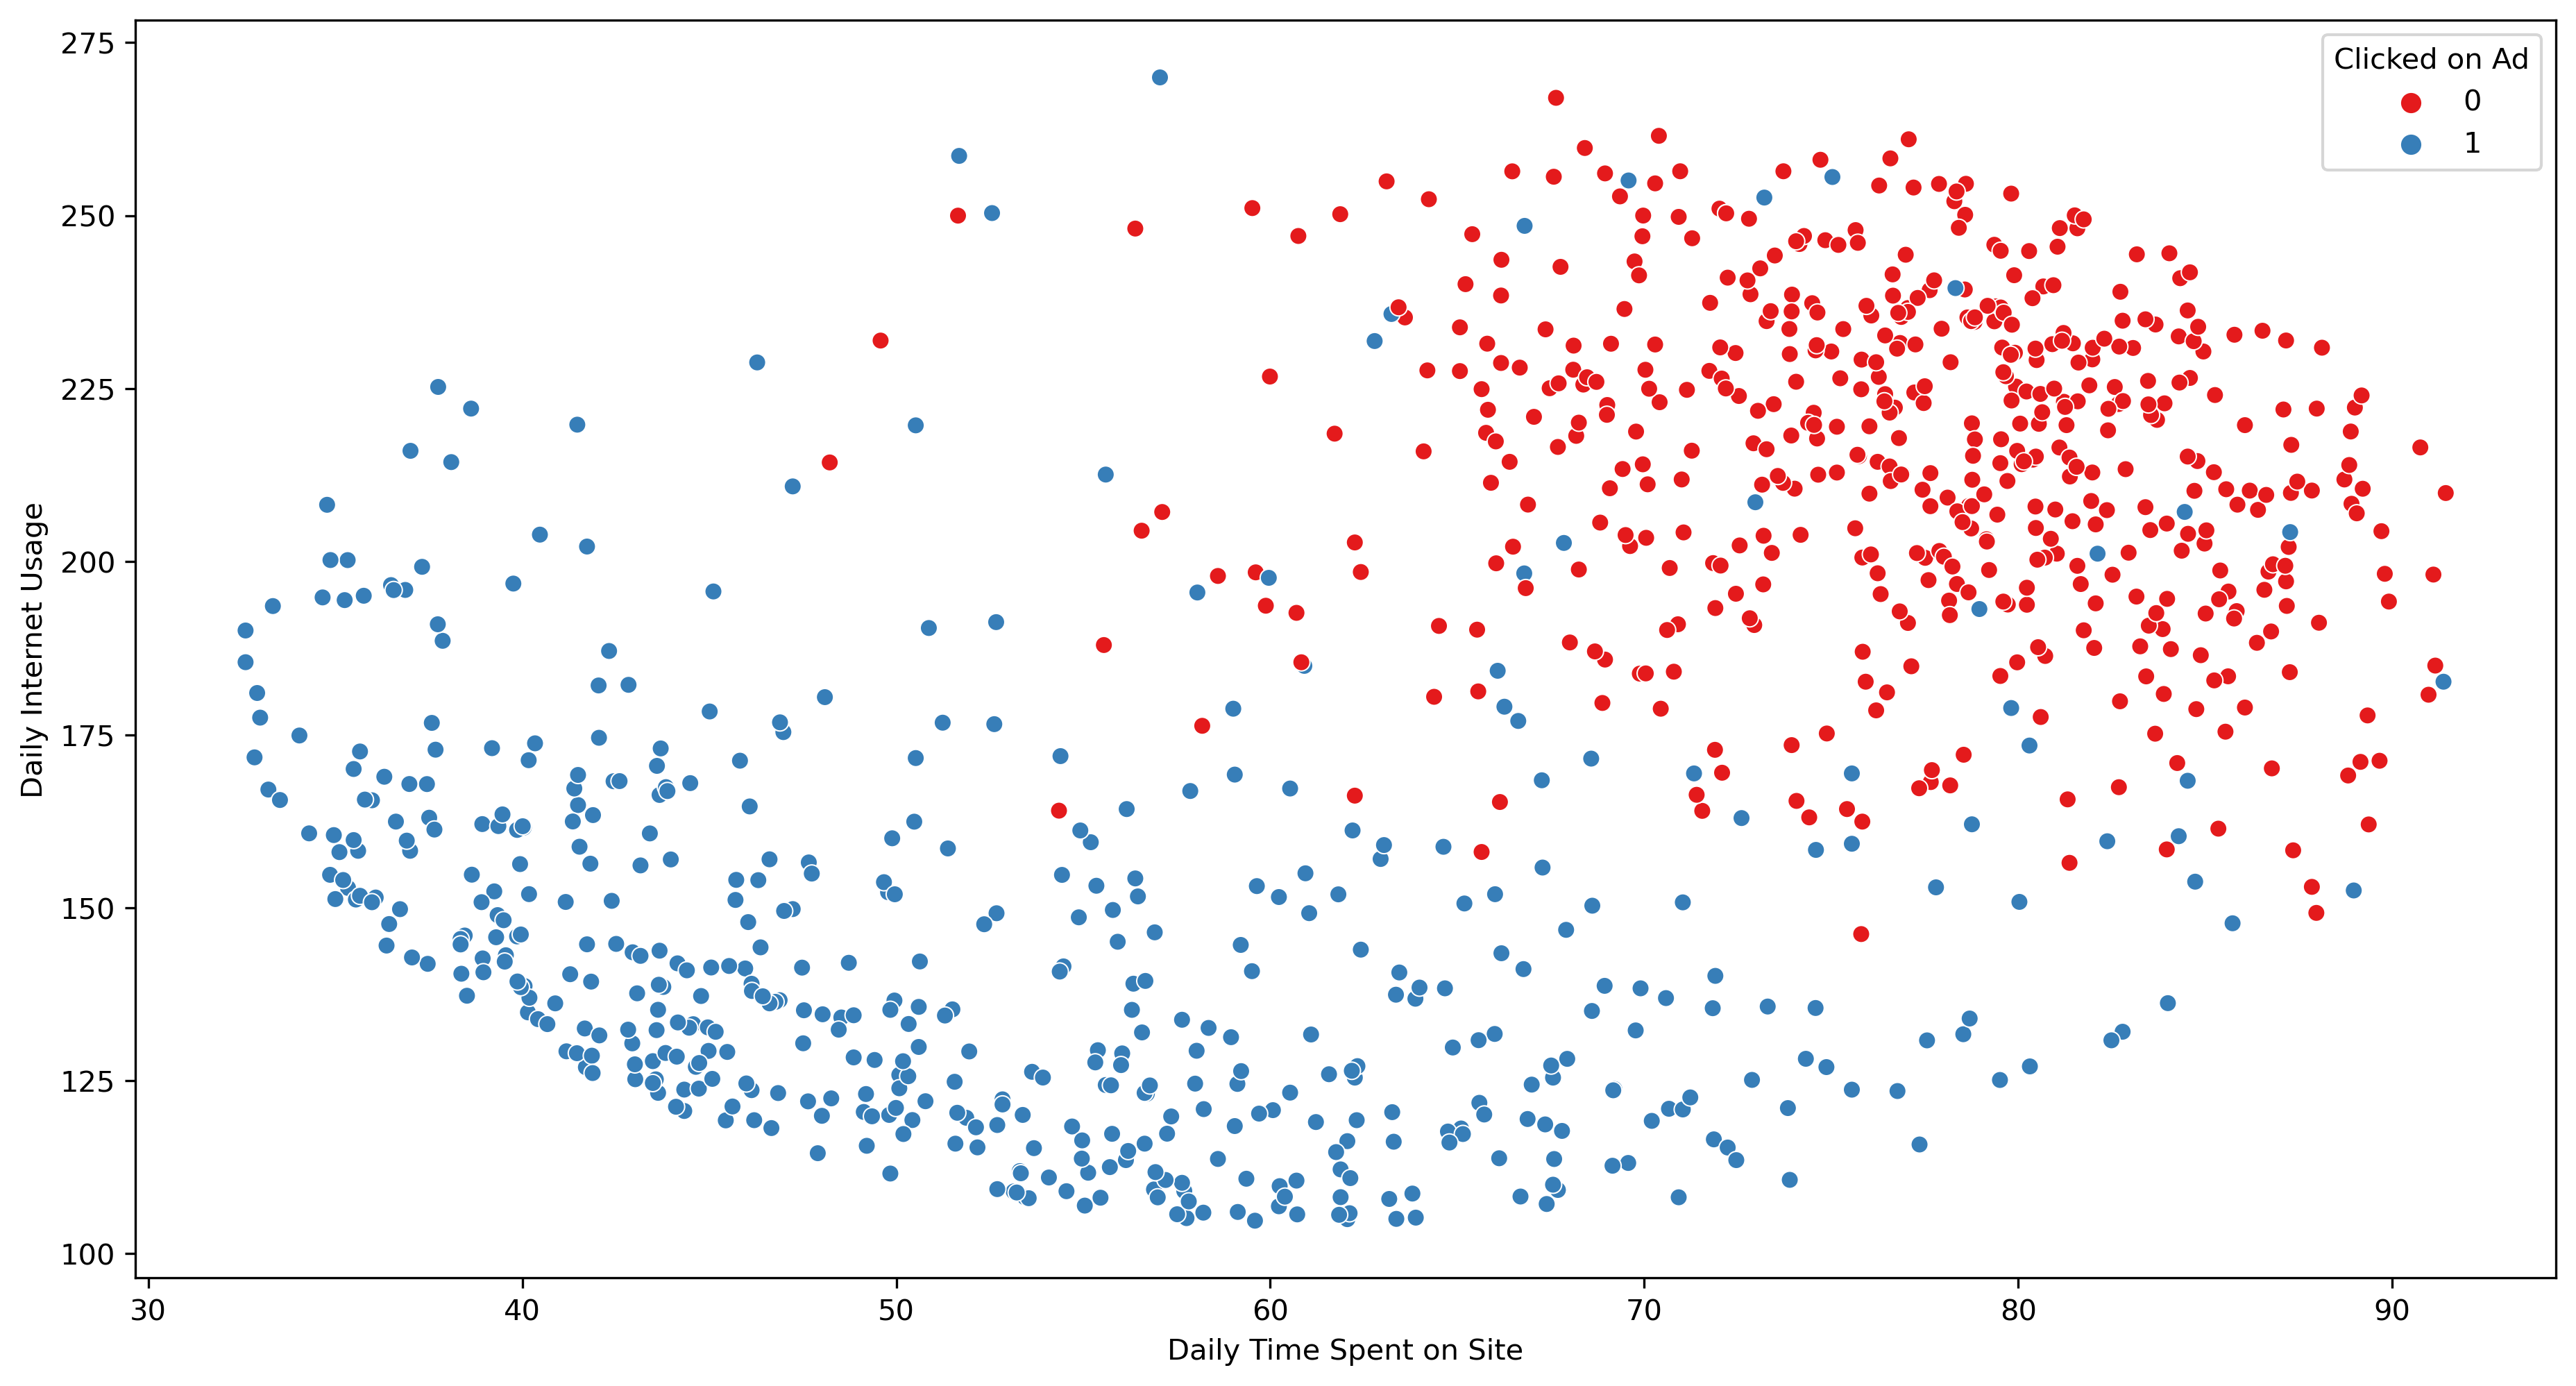

In [85]:
plt .figure( figsize=(15,8),dpi=300)
sns.scatterplot(x=df['Daily Time Spent on Site'],y=df['Daily Internet Usage'],hue=df['Clicked on Ad'],palette='Set1');

In [78]:
df['DTS*DIU']=df['Daily Time Spent on Site']*df['Daily Internet Usage']

In [79]:
px.scatter_3d(df, x='Daily Time Spent on Site', y='Daily Internet Usage', z='DTS*DIU',color=df['Clicked on Ad'])

## Train Test Split

In [87]:
from sklearn.model_selection import train_test_split

In [89]:
X=df_fit
y=df['Clicked on Ad']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3
                                        , random_state=42)

## Creating the model

In [91]:
from sklearn.svm import SVC

In [110]:
model=SVC(kernel='linear')

In [111]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [112]:
pred=model.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [114]:
print(accuracy_score(y_test,pred)*100)

95.66666666666667
